# **Housing Price Prediction Assignment**
---
### **Problem Statement**
---
>A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
*   Which variables are significant in predicting the price of a house
*   How well those variables describe the price of a house.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.








In [ ]:
#Mount to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Step 1 - Understanding the Data**

In [ ]:
# importing all the important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading data
house_data = pd.read_csv('/content/drive/MyDrive/MS in AI & ML/Assignments/Housing Price/train.csv')
house_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
house_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [ ]:
# checking whether any column has duplicated adat or not

house_data.duplicated().any()

False

### **Imputing Null values**

In [ ]:
# Printing the columns which has null value percentage greater than zero in descending order

null_count = house_data.isnull().sum(axis=0)
null_percent = null_count / house_data.shape[0] * 100
null_valued_columns = null_percent[null_percent>0].sort_values(ascending=False)
null_valued_columns

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

* **According to the dictionary the NULL values present in these columns is showing the absence of fascility so it affects the property price.**
  * So replacing those NULL values with "None" label.





In [ ]:
# Replacing those NULL values with "None" label.
Meaningful_Nulls = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for col in Meaningful_Nulls:
    house_data[col].fillna("none", inplace=True)


In [ ]:
# checking the columns which still has null value percentage greater than zero in descending order

null_count = house_data.isnull().sum(axis=0)
null_percent = null_count / house_data.shape[0] * 100
null_valued_columns = null_percent[null_percent>0].sort_values(ascending=False)
null_valued_columns

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [ ]:
house_data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [ ]:
house_data.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [ ]:
house_data.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [ ]:
house_data.Electrical.describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [ ]:
# Since Electrical feature has such low null value portion we can simply drop it.
house_data.Electrical.dropna(inplace=True)

**As per the data dictionary "LotFrontage" is Linear feet of street connected to property. Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values.**


In [ ]:
house_data['LotFrontage'] = house_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Imputing other null values with median values
house_data["GarageYrBlt"].fillna(house_data["GarageYrBlt"].median(), inplace=True)
house_data["MasVnrArea"].fillna(house_data["MasVnrArea"].median(), inplace=True)

In [ ]:
# Drop 'Id' from Dataframe
house_data = house_data.drop(['Id'], axis=1)
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  none      Reg   
1          20       RL         80.0     9600   Pave  none      Reg   
2          60       RL         68.0    11250   Pave  none      IR1   
3          70       RL         60.0     9550   Pave  none      IR1   
4          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0   none  none        none   
1         Lvl    AllPub       FR2  ...        0   none  none        none   
2         Lvl    AllPub    Inside  ...        0   none  none        none   
3         Lvl    AllPub    Corner  ...        0   none  none        none   
4         Lvl    AllPub       FR2  ...        0   none  none        none   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

## **Step 2 - Visualizing and Dropping certain features**

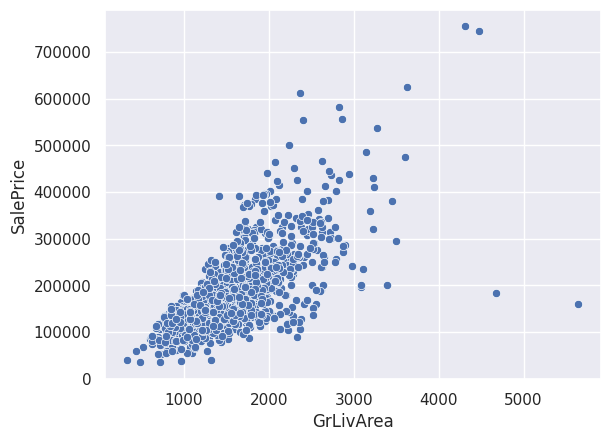

In [ ]:
import seaborn as sns

# Create a scatter plot of SalesPrice vs. GrLivArea
sns.scatterplot(x="GrLivArea", y="SalePrice", data=house_data)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

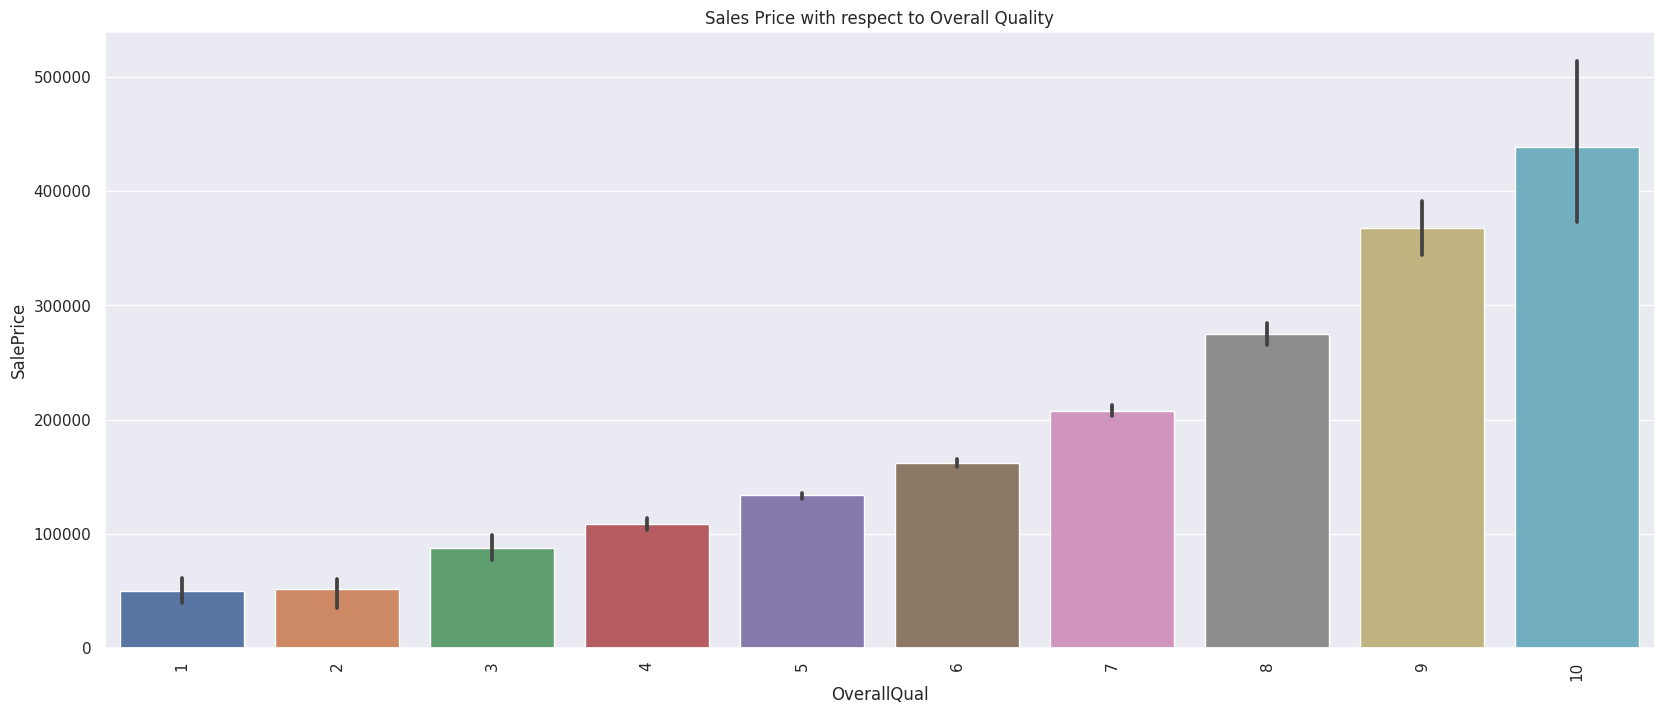

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= house_data)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

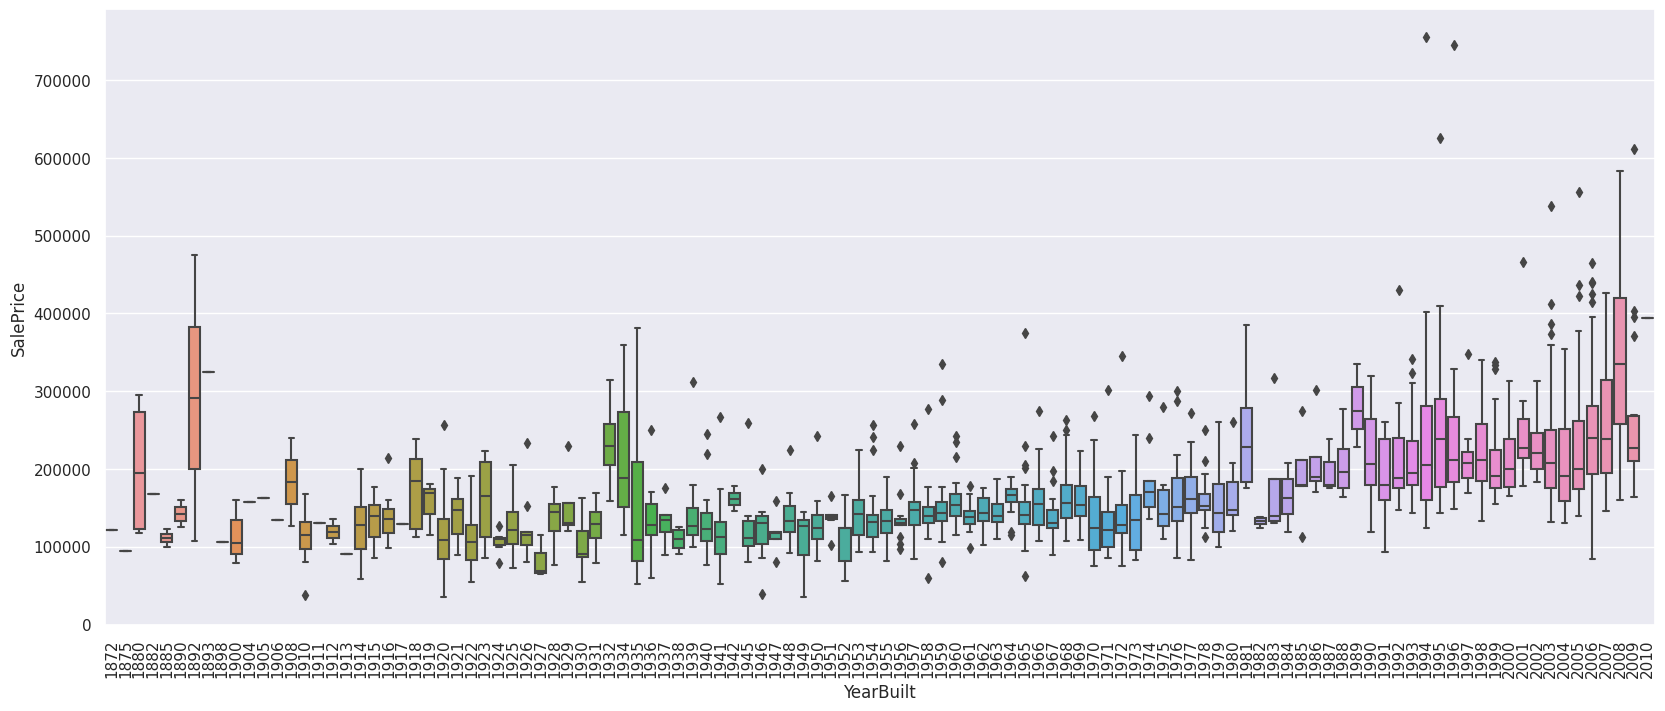

In [ ]:
# Create a box plot of SalesPrice by YearBuilt
plt.figure(figsize=(20, 8))
sns.boxplot(x="YearBuilt", y="SalePrice", data=house_data)
plt.xticks(rotation=90)
plt.show()

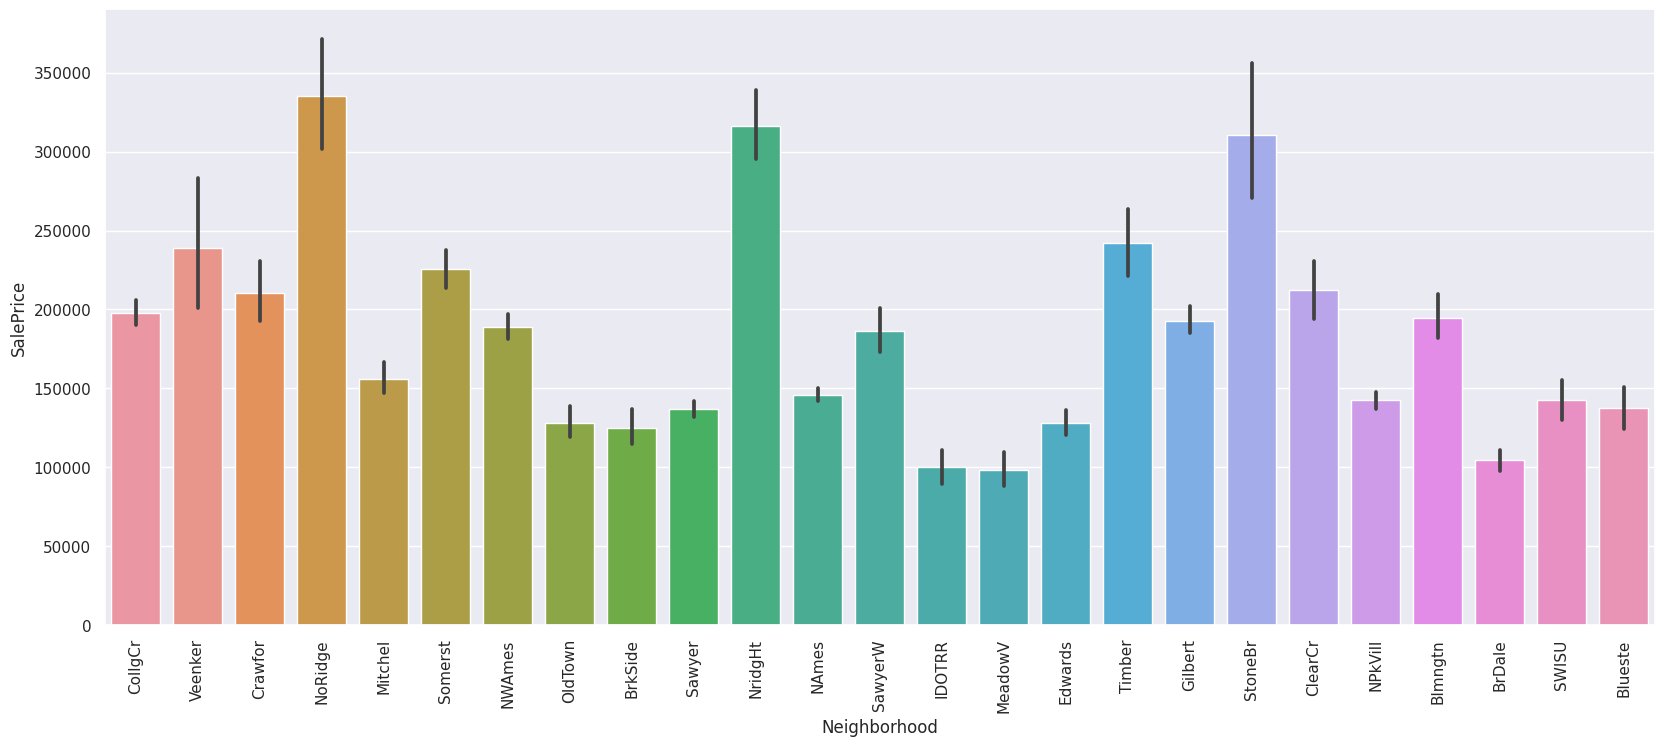

In [ ]:
# Create a bar chart of SalesPrice by Neighborhood
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data=house_data)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='SalePrice', ylabel='Density'>

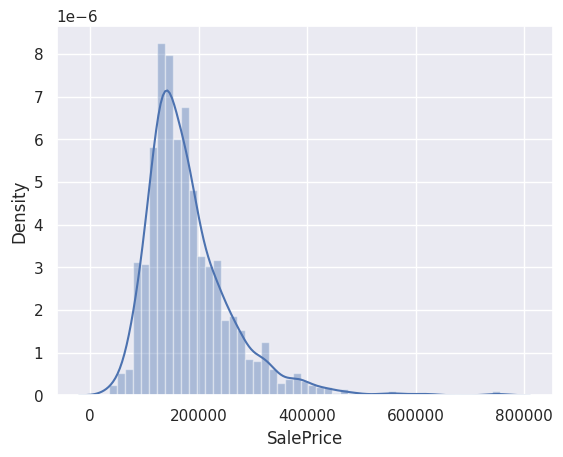

In [ ]:
# Create a histogram of SalesPrice
sns.distplot(house_data.SalePrice)

* **Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data.**

<Axes: xlabel='SalePrice', ylabel='Density'>

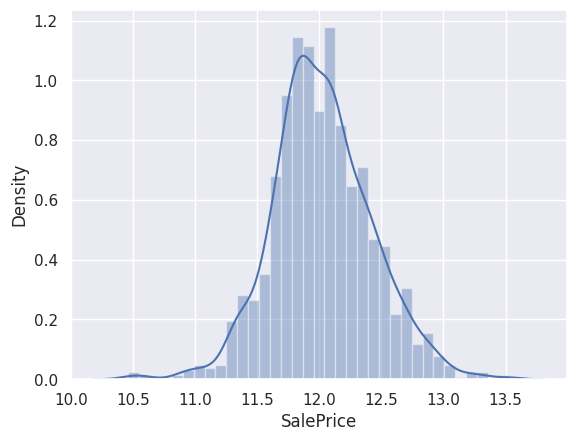

In [ ]:
# Applying log transformation to Salesprice columns
house_data.SalePrice = np.log(house_data.SalePrice)
sns.distplot(house_data.SalePrice)


In [ ]:
corr_mat = house_data.corr()
corr_mat

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.370367 -0.139781     0.032628    -0.059316   
LotFrontage     -0.370367     1.000000  0.335957     0.239546    -0.043595   
LotArea         -0.139781     0.335957  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.239546  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.043595 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.120999  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.084550  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.195830  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.232576  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.052237  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.119174 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.381038  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.434109  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.075686  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.031873  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.385190  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.107226  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333     0.006620  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.186561  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.054190  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.245232  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.005627 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.332619  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.249295  0.271364     0.396765    -0.023820   
GarageYrBlt      0.081396     0.062380 -0.025865     0.514231    -0.306276   
GarageCars      -0.040110     0.281393  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.339085  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088736  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.141734  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.008057 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.064654  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041063  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.174567  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.005332  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.007370  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.004756 -0.014261    -0.027347     0.043950   
SalePrice       -0.073959     0.353288  0.257320     0.817184    -0.036868   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.120999      0.084550    0.195830    0.232576    0.052237   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

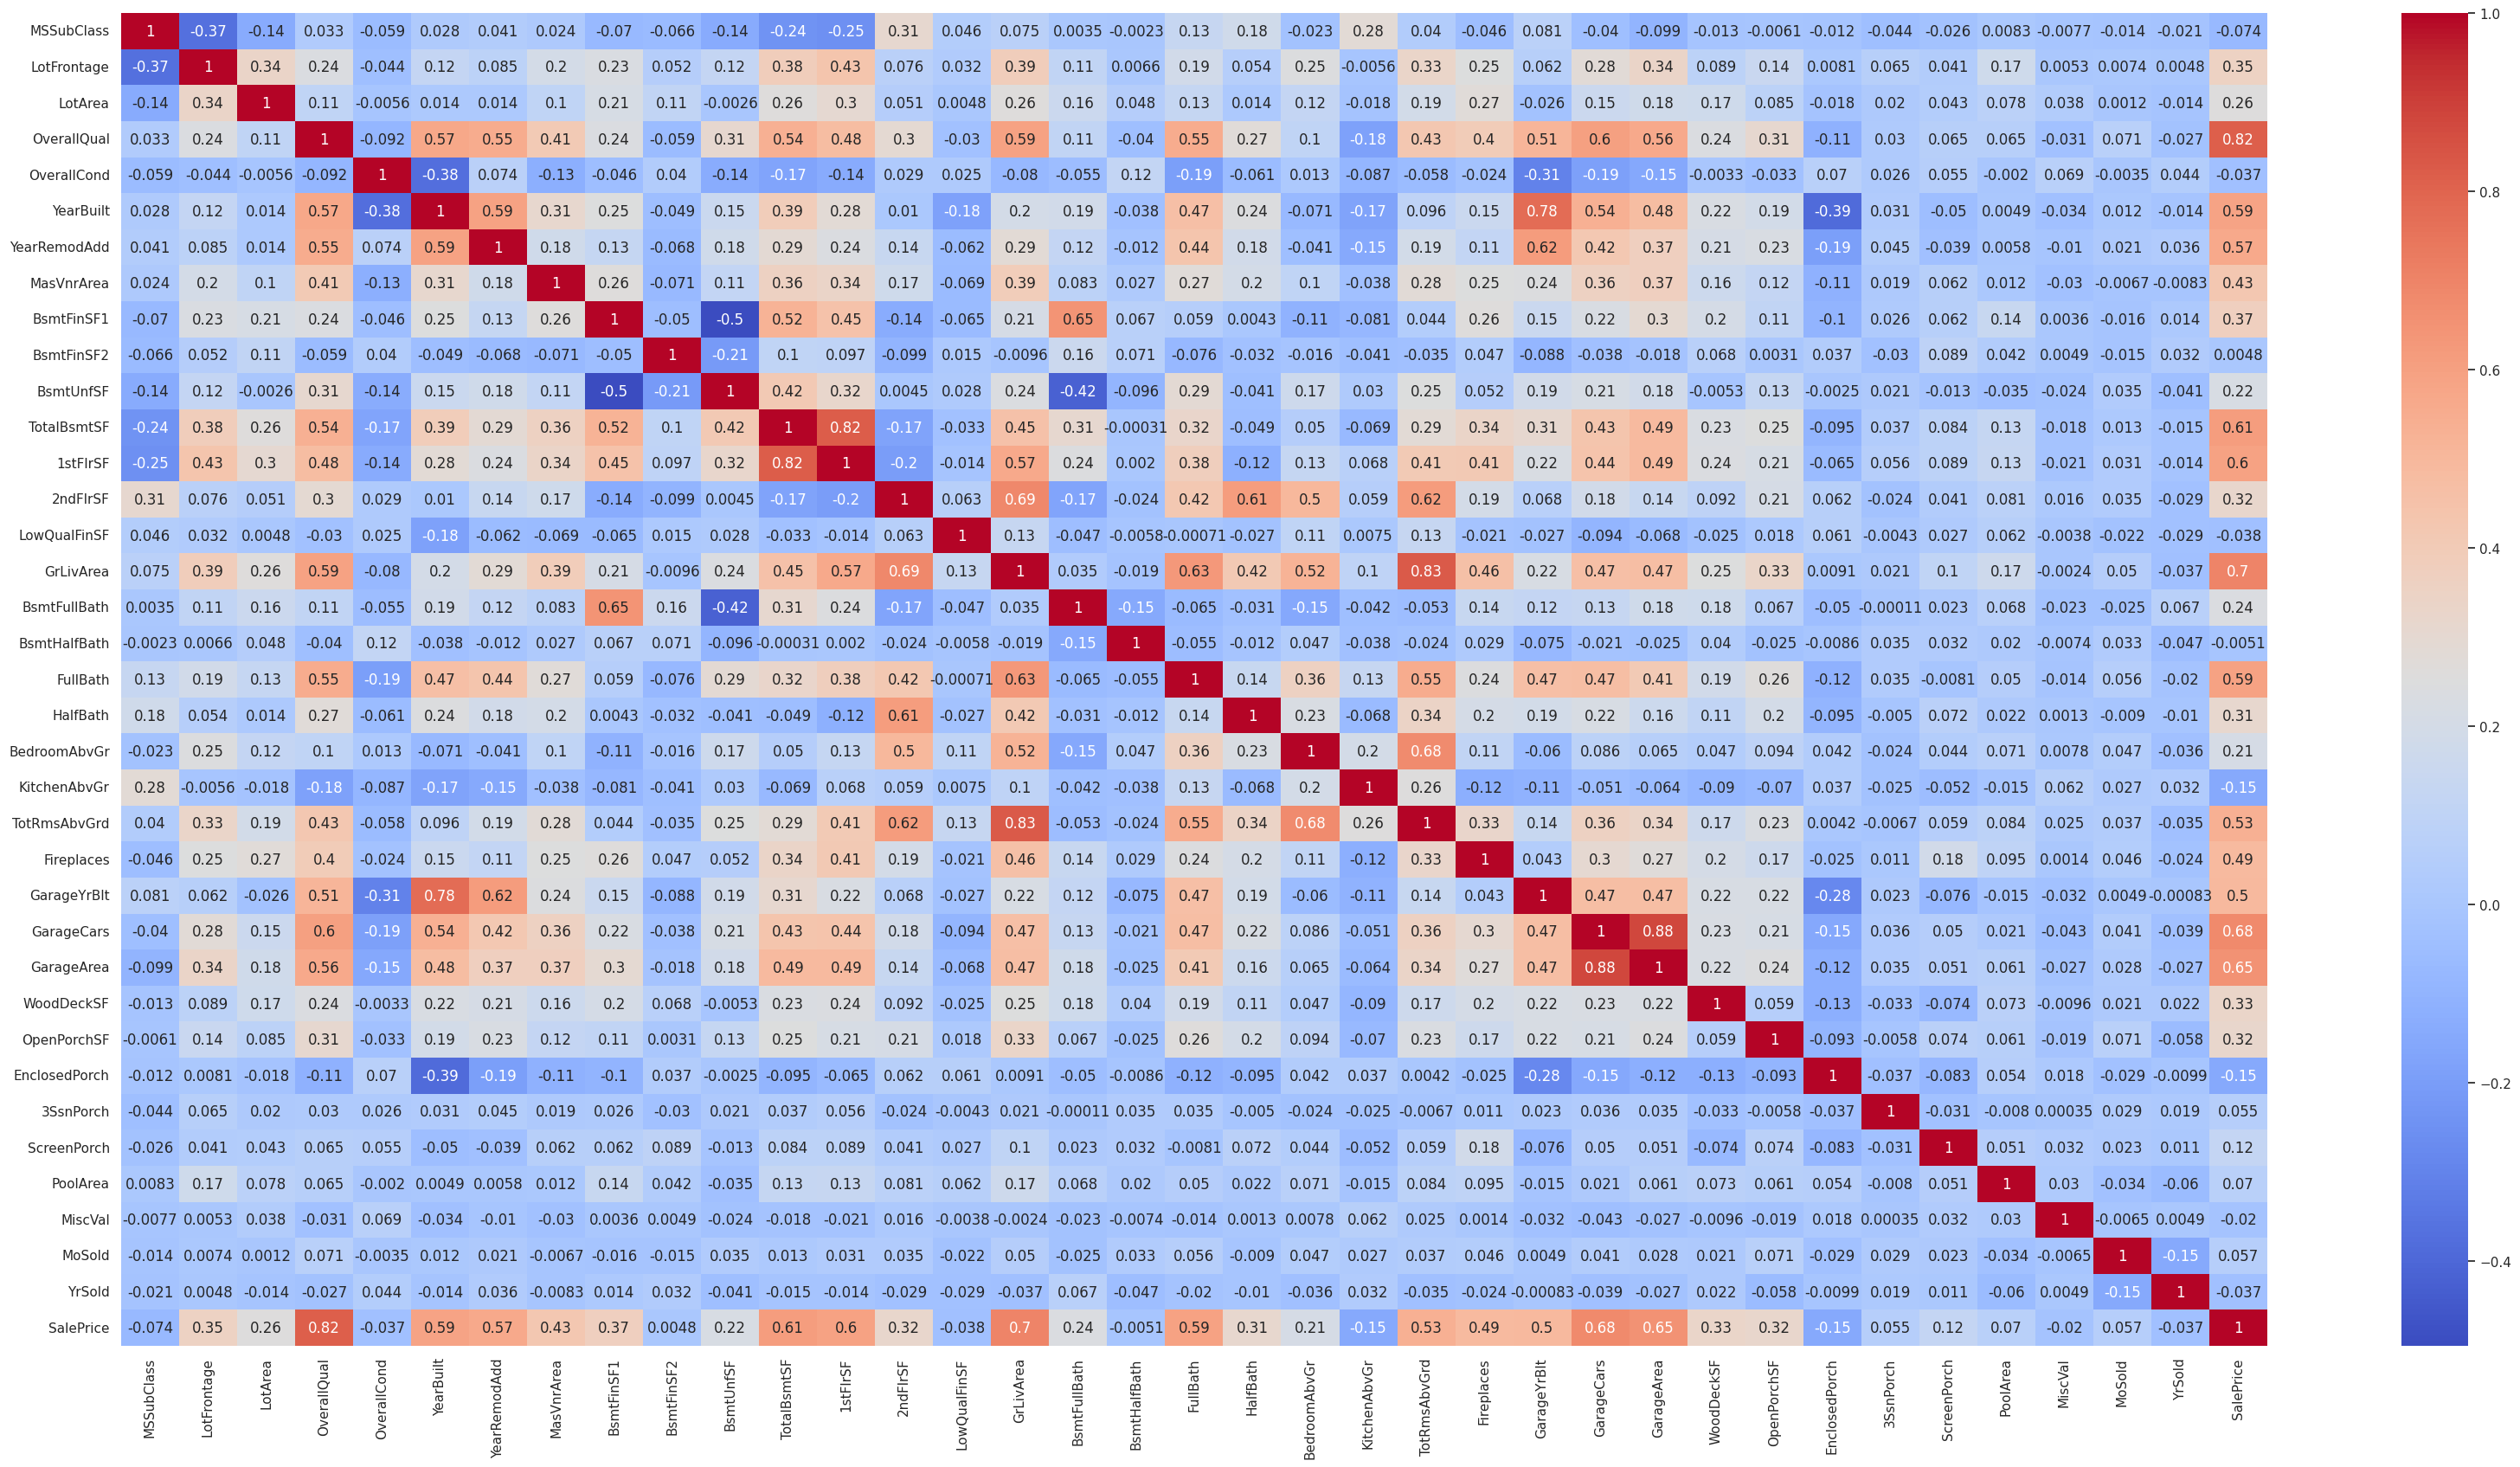

In [ ]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(40,20))

# heatmap
corr_mat = house_data.corr()
sns.heatmap(corr_mat, cmap="coolwarm", annot=True)
plt.show()

* **We can see thta there are certain features which are highly correlated so need to further investigate them to check their predictive power.**

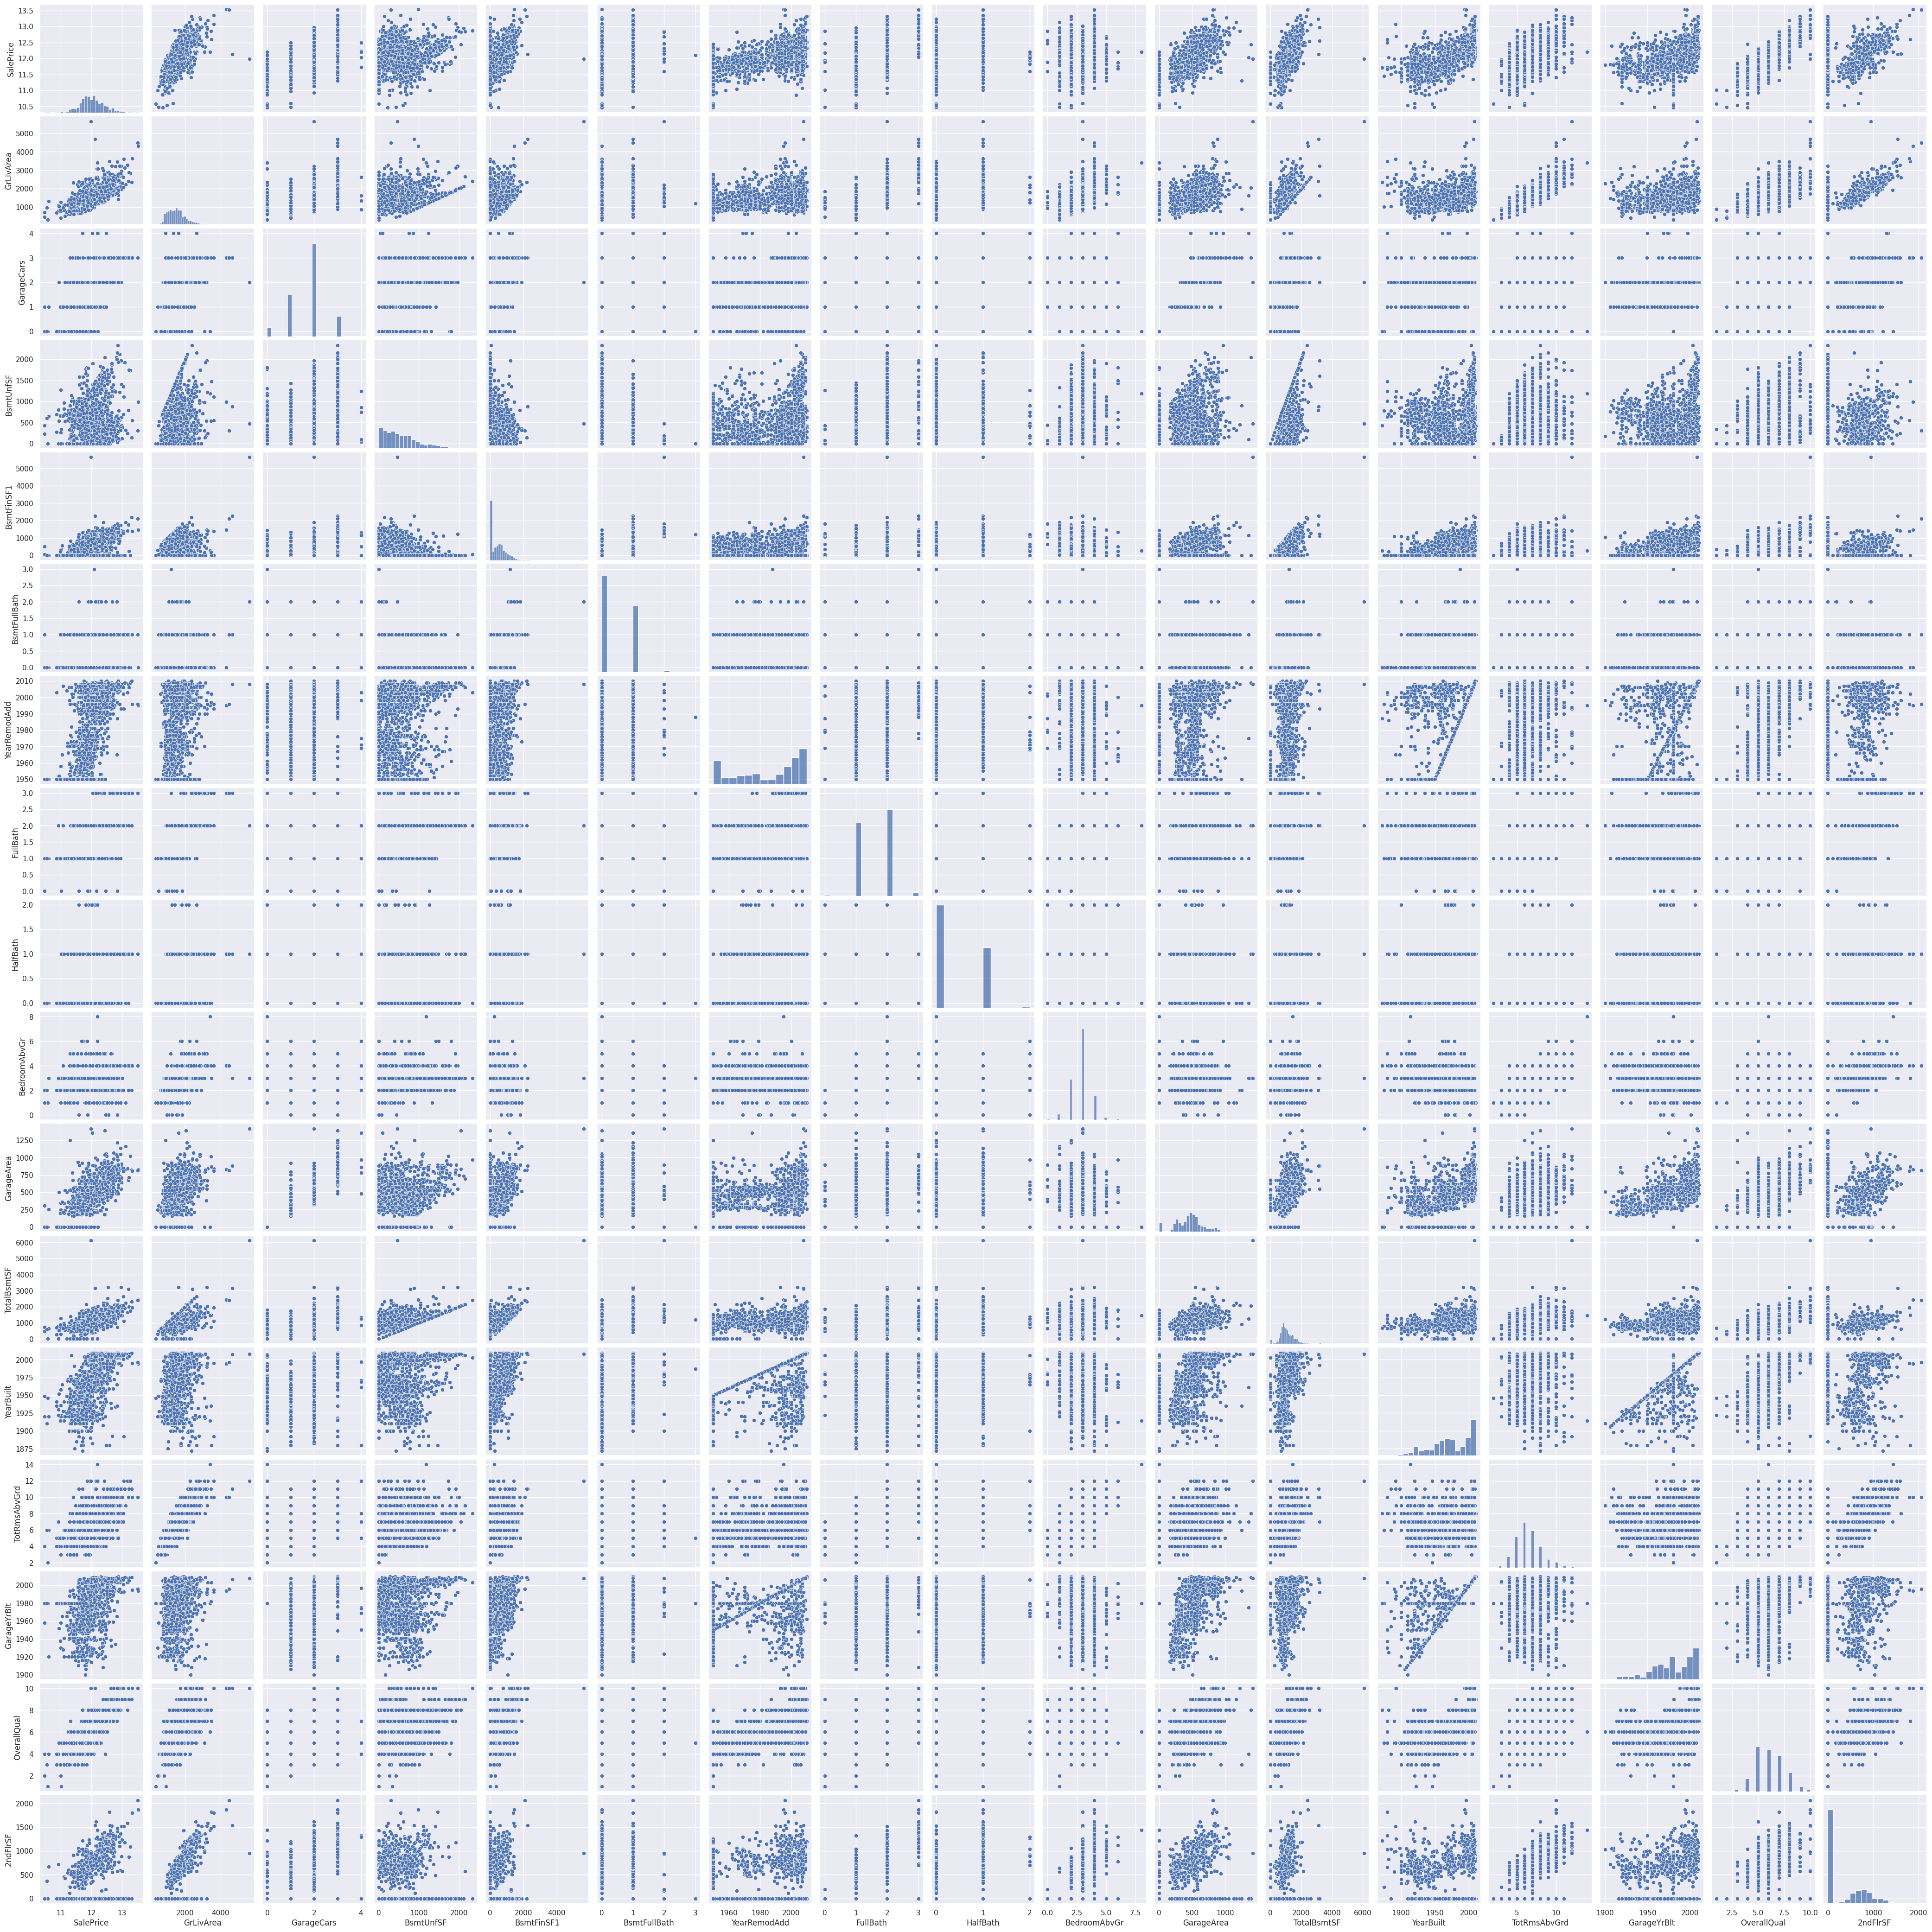

In [ ]:
# List of highly correlated features.
sns.set()
high_corr_features = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFullBath', 'YearRemodAdd', 'FullBath', 'HalfBath',
                      'BedroomAbvGr', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt', 'OverallQual', '2ndFlrSF']
sns.pairplot(house_data[high_corr_features], size = 2.5)
plt.show()

* **These are some columns which doesn't contibute much to the target variable.**

In [ ]:
house_data.drop(columns = ['GarageCars', 'BsmtUnfSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'BsmtFullBath', 'YearRemodAdd', 'FullBath', 'HalfBath','BedroomAbvGr'], inplace = True)

In [ ]:
house_data.shape

(1460, 71)

* **We can derive a column for 'Age of the property' when it was sold: Name it as 'PropAge'.**

In [ ]:
# PropAge -  Property Age from yearsold - yearbuilt
house_data['PropAge'] = (house_data['YrSold'] - house_data['YearBuilt'])
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  none      Reg   
1          20       RL         80.0     9600   Pave  none      Reg   
2          60       RL         68.0    11250   Pave  none      IR1   
3          70       RL         60.0     9550   Pave  none      IR1   
4          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig  ... PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    Inside  ...   none  none        none       0   
1         Lvl    AllPub       FR2  ...   none  none        none       0   
2         Lvl    AllPub    Inside  ...   none  none        none       0   
3         Lvl    AllPub    Corner  ...   none  none        none       0   
4         Lvl    AllPub       FR2  ...   none  none        none       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice PropAge  
0      2   2008        WD         Normal  12.247694       5  
1      5   2007        WD         Normal  12.109011      31  
2      9   2008        WD         Normal  12.317167       7  
3      2   2006        WD        Abnorml  11.849398      91  
4     12   2008        WD         Normal  12.429216       8  

[5 rows x 72 columns]

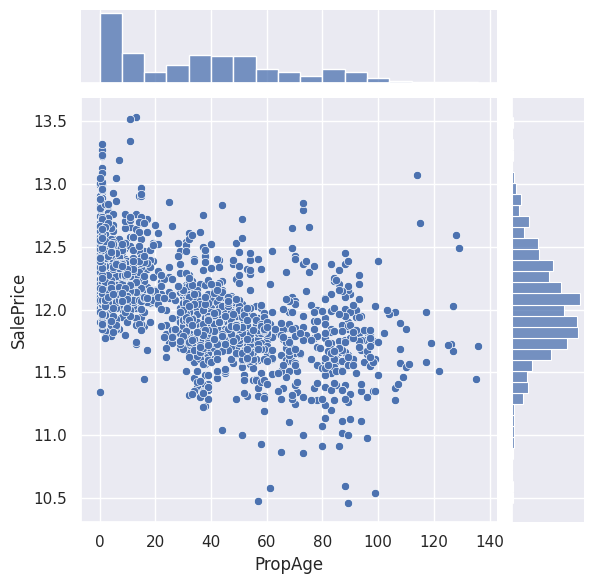

In [ ]:
# PropAge vs SalePrice
sns.jointplot(x = house_data['PropAge'], y = house_data['SalePrice'])
plt.show()

* **Increase in Property Age shows a decreasing saleprice trend i.e newer the property, high is the value.**
* **Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further**

In [ ]:
house_data.drop(columns = ['MoSold', 'YrSold', 'YearBuilt'], inplace = True)

### **Checking the Diversity/Variance of the features**

In [ ]:
# Checking the variance of the features
feature_categrs = house_data.nunique().index
low_variance_features = []
for feature in feature_categrs:
  print((house_data[feature].value_counts()/len(house_data))*100)
  # Appending columns which has very low variability, basically containing high number of same values.
  if ((house_data[feature].value_counts()/len(house_data)) >= 0.97).any():
    low_variance_features.append(feature)

20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
60.0     10.410959
80.0      7.671233
70.0      6.438356
65.0      5.068493
73.0      4.794521
           ...    
137.0     0.068493
140.0     0.068493
38.0      0.068493
150.0     0.068493
46.0      0.068493
Name: LotFrontage, Length: 115, dtype: float64
7200     1.712329
9600     1.643836
6000     1.164384
9000     0.958904
8400     0.958904
           ...   
14601    0.068493
13682    0.068493
4058     0.068493
17104    0.068493
9717     0.068493
Name: LotArea, Length: 1073, dtype: float64
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
none    93.76

* **These are the features which has very low variance or we can say low data diversity so they will not contribute much the model so dropping them.**

In [ ]:
print(low_variance_features)

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', '3SsnPorch', 'PoolArea', 'PoolQC']


In [ ]:
house_data.drop(columns = low_variance_features, inplace = True)

In [ ]:
house_data.shape

(1460, 60)

## **Step 3 - Preparing the Data**

In [ ]:
# Type of each feature in data: int, float, object
types = house_data.dtypes
# Numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)]
# Categorical values are type object
categorical_type = types[types == object]
# We should convert numeric_type to a list to make it easier to work with
numerical_columns = list(numeric_type.index)
print(numerical_columns)
# Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice', 'PropAge']
['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [ ]:
house_data = pd.get_dummies(house_data, drop_first=True )
house_data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         706           0          856       856  ...               0   
1         978           0         1262      1262  ...               0   
2         486           0          920       920  ...               0   
3         216           0          756       961  ...               0   
4         655           0         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 223 columns]

## **Step 4 : Splitting the dataframe into training and testing data**

In [ ]:
# splitting the dataframe into Train and Test

np.random.seed(0)
house_data_train, house_data_test = train_test_split(house_data, train_size = 0.7, random_state = 100)

In [ ]:
house_data_train.shape

(1021, 223)

In [ ]:
house_data_test.shape

(439, 223)

In [ ]:
# let's scale the training data
scaler = MinMaxScaler()

# Applying the minmax scaler on the continuous data for train set
house_data_train[numerical_columns] = scaler.fit_transform(house_data_train[numerical_columns])
# Applying the minmax scaler on the continuous data for test set
house_data_test[numerical_columns] = scaler.transform(house_data_test[numerical_columns])

In [ ]:
house_data_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
318     0.235294     0.236301  0.039403     0.666667        0.500        0.16   
239     0.176471     0.106164  0.033981     0.555556        0.375        0.00   
986     0.176471     0.130137  0.017931     0.555556        0.875        0.00   
1416    1.000000     0.133562  0.046139     0.333333        0.625        0.00   
390     0.176471     0.099315  0.032409     0.444444        0.875        0.00   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
318     0.174876    0.000000     0.220458  0.231481  ...               0   
239     0.016655    0.000000     0.120295  0.098611  ...               0   
986     0.000000    0.000000     0.079378  0.145602  ...               0   
1416    0.000000    0.000000     0.127169  0.202315  ...               0   
390     0.042700    0.265265     0.140917  0.136343  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
318                0             0             0            1   
239                0             0             0            1   
986                0             0             0            1   
1416               0             0             0            1   
390                0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
318                       0                     0                     0   
239                       0                     0                     0   
986                       0                     0                     0   
1416                      0                     0                     0   
390                       0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
318                      1                      0  
239                      1                      0  
986                      1                      0  
1416                     1                      0  
390                      1                      0  

[5 rows x 223 columns]

In [ ]:
# Defining target variable for train set
y_train = house_data_train.pop('SalePrice')
X_train = house_data_train
# Defining target variable for test set
y_test = house_data_test.pop('SalePrice')
X_test = house_data_test

## **Step 5.1 - Linear Regression**

### **Automatic Feature Selection using RFE**

In [ ]:
# Recursive feature elimination

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=29)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#List of variables selected in top 29 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 31),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 110),
 ('BsmtFinSF1', False, 75),
 ('BsmtFinSF2', False, 70),
 ('TotalBsmtSF', False, 181),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 147),
 ('GrLivArea', True, 1),
 ('BsmtHalfBath', False, 176),
 ('KitchenAbvGr', False, 99),
 ('Fireplaces', False, 138),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 115),
 ('OpenPorchSF', False, 175),
 ('EnclosedPorch', False, 56),
 ('ScreenPorch', False, 69),
 ('MiscVal', False, 20),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Alley_Pave', False, 98),
 ('Alley_none', False, 167),
 ('LotShape_IR2', False, 178),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 160),
 ('LandContour_HLS', False, 29),
 ('LandContour_Low', False, 28),
 ('LandContour_Lvl', False, 30),
 ('LotConfig_CulDSac', False, 84),
 ('Lo

In [ ]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF',
       'GrLivArea', 'GarageArea', 'PropAge', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Veenker', 'BldgType_Twnhs', 'Exterior1st_BrkComm',
       'Exterior2nd_AsphShn', 'Foundation_Stone', 'BsmtQual_none',
       'HeatingQC_Po', 'Functional_Maj2', 'Functional_Sev', 'GarageQual_Po',
       'SaleType_Con', 'SaleType_ConLD'],
      dtype='object')

In [ ]:
# Checking rejected columns by RFE

X_train.columns[~rfe.support_]

Index(['MSSubClass', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
       '2ndFlrSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=193)

In [ ]:
# Dataframe of RFE supported features
X_train_rfe_sup = X_train[col]

### **Building Model**

In [ ]:
# Building 1st linear regression model

X_train_rfe_lm = sm.add_constant(X_train_rfe_sup)
lr_model_1 = sm.OLS(y_train,X_train_rfe_lm).fit()
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     232.2
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:22:21   Log-Likelihood:                 1690.9
No. Observations:                1021   AIC:                            -3322.
Df Residuals:                     991   BIC:                            -3174.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0769 

In [ ]:
# Creating a dataframe for the coefficients obtained from Linear Regression
para = pd.DataFrame(lr_model_1.params)
para.reset_index(inplace=True)
para.columns = ['Variable', 'Coeff']
para.head(30)

Variable     Coeff
0                  const  0.076934
1            LotFrontage -0.067514
2                LotArea  0.197476
3            OverallQual  0.240335
4            OverallCond  0.125181
5               1stFlrSF  0.116038
6              GrLivArea  0.369439
7             GarageArea  0.105047
8                PropAge -0.165046
9            MSZoning_FV  0.152404
10           MSZoning_RH  0.126249
11           MSZoning_RL  0.139121
12           MSZoning_RM  0.113032
13          LotShape_IR3 -0.050990
14  Neighborhood_ClearCr  0.053215
15  Neighborhood_Crawfor  0.062955
16  Neighborhood_NoRidge  0.043610
17  Neighborhood_NridgHt  0.049144
18  Neighborhood_Veenker  0.037397
19        BldgType_Twnhs -0.060672
20   Exterior1st_BrkComm -0.104636
21   Exterior2nd_AsphShn -0.052414
22      Foundation_Stone  0.048271
23         BsmtQual_none -0.052981
24          HeatingQC_Po -0.058509
25       Functional_Maj2 -0.052120
26        Functional_Sev -0.150975
27         GarageQual_Po -0.069748
28          SaleType_Con  0.041495
29        SaleType_ConLD  0.055104

### **Model Evaluation**

In [ ]:
# prediction on the train set(Using R2)
y_train_pred = lr_model_1.predict(X_train_rfe_lm)
lr_train_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

# prediction on the test set(Using R2)
X_test_lm = sm.add_constant(X_test)
X_test_lm = X_test_lm[X_train_rfe_lm.columns]
y_test_pred = lr_model_1.predict(X_test_lm)
lr_test_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8716966623051186
0.8658898535954003


In [ ]:
# Calculate RSS for train set
residuals = y_train - y_train_pred
lr_train_RSS = sum(residuals ** 2)
print(lr_train_RSS)

# Calculate RSS for test set
residuals = y_test - y_test_pred
lr_test_RSS = sum(residuals ** 2)
print(lr_test_RSS)

2.178158791373745
1.0267136315574918


In [ ]:
# Calculate adjusted R-squared for train set
num_predictors = len(X_train_rfe_sup.columns)
n = len(X_train_rfe_lm)
lr_train_adj_r2 = 1 - ((1 - lr_train_r2) * (n - 1) / (n - num_predictors - 1))
print(lr_train_adj_r2)

# Calculate adjusted R-squared for test set
n = len(X_test_lm)
lr_test_adj_r2 = 1 - ((1 - lr_test_r2) * (n - 1) / (n - num_predictors - 1))
print(lr_test_adj_r2)

0.8679420742191937
0.8563808212097441


In [ ]:
# Calculate RMSE for train set
lr_train_RMSE = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

# Calculate RMSE for test set
lr_test_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.046188291457370155
RMSE : 0.04836068056758628


### **Residual Analysis**
**In Residual Analysis we check below mentioned characteristics,**
* Normality of Error Terms
* Colinearity
* Homoscedasticity
* Indepedance of residuals

* **Normality of Error Terms**


Text(0.5, 0, 'Errors')

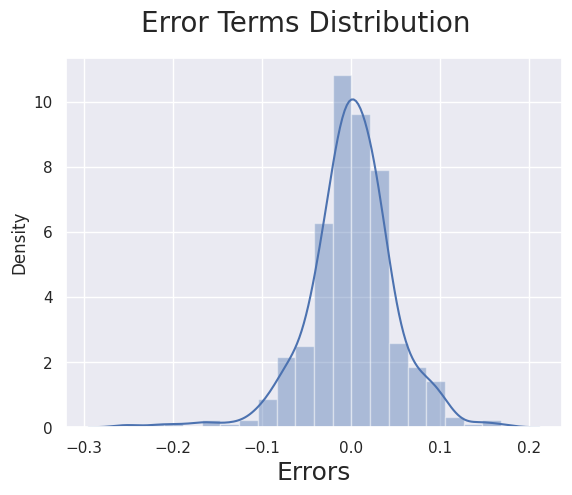

In [ ]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_test-y_test_pred), bins = 20)
fig.suptitle('Error Terms Distribution', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

* **Colinearity**

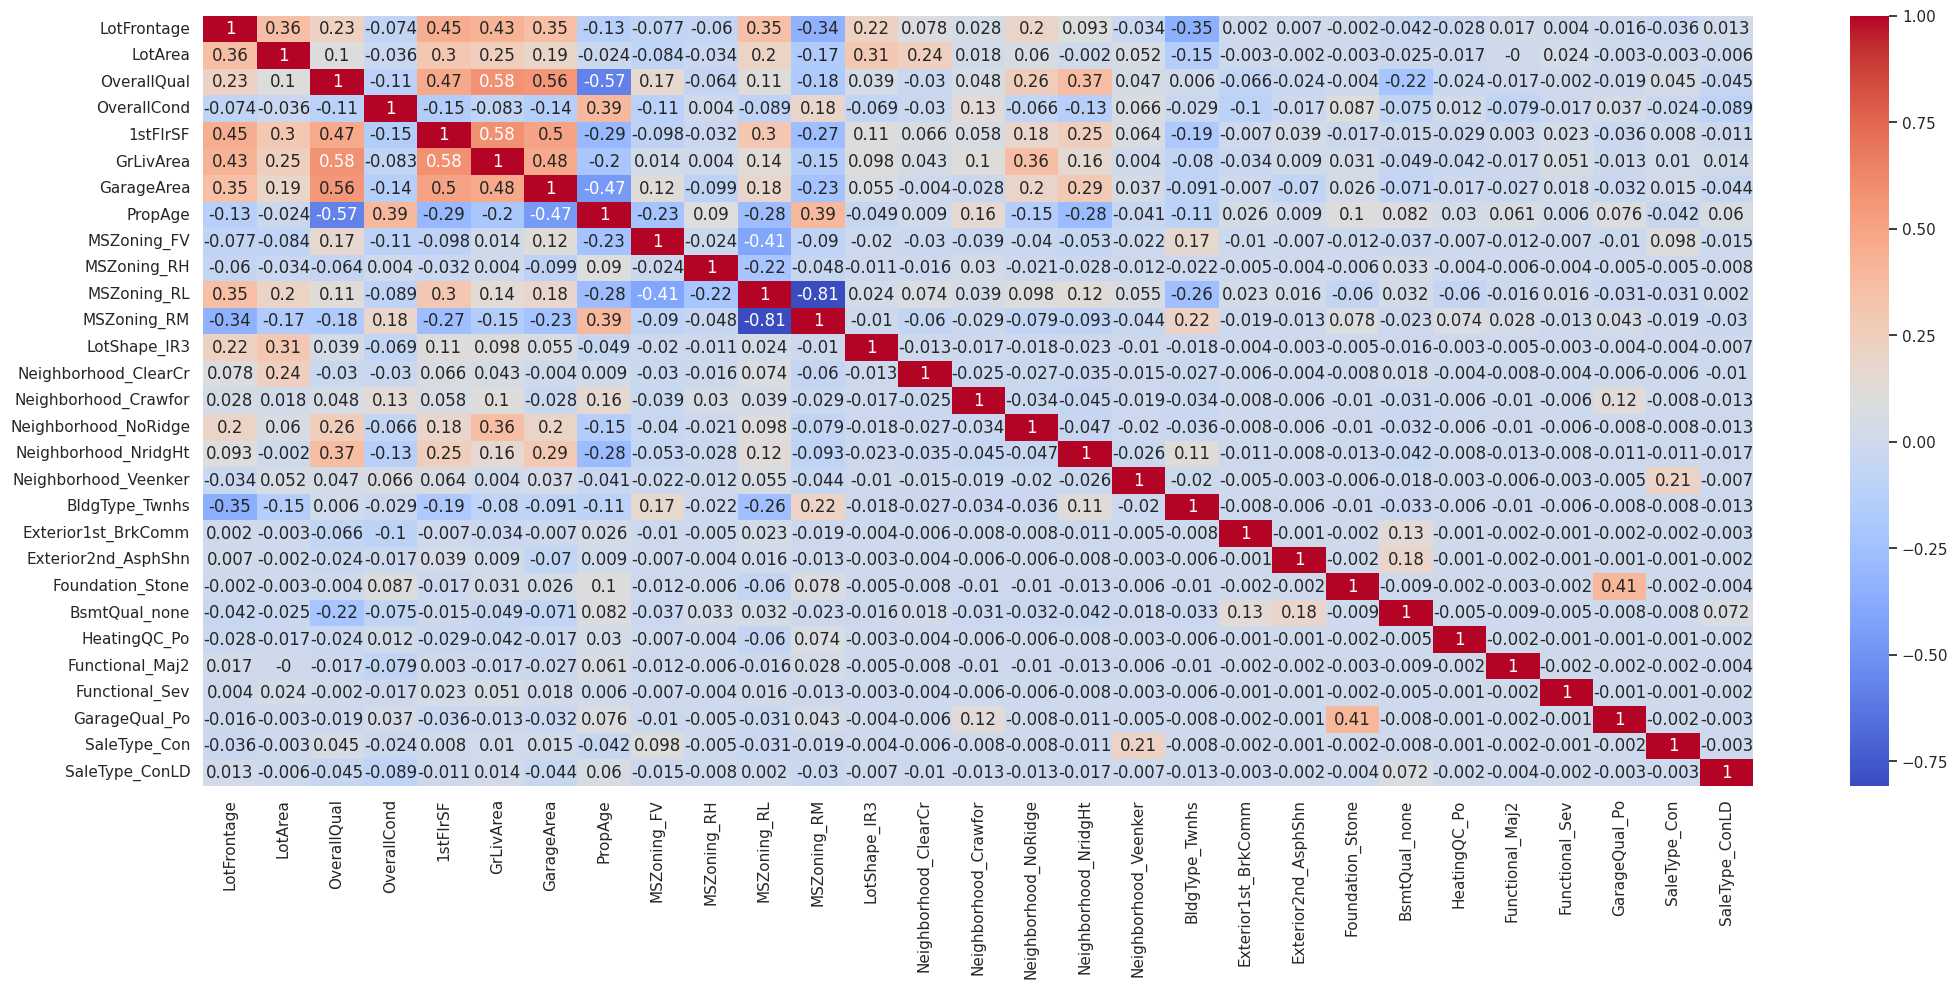

In [ ]:
# Let's check pairwise correlation
plt.figure(figsize=(25,10))
sns.heatmap(X_train_rfe_sup.corr().round(3), annot=True, cmap="coolwarm")
plt.show()

* **Homoscedasticity**

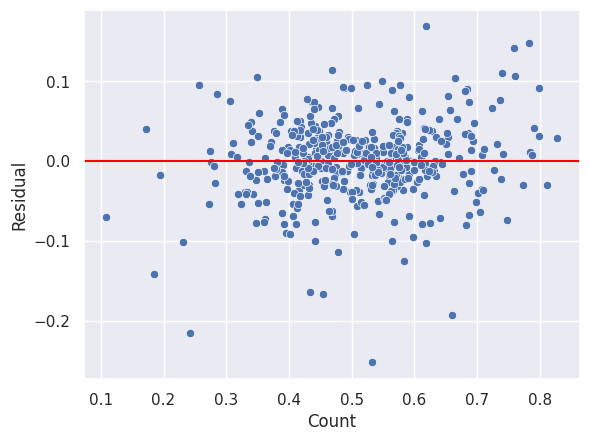

In [ ]:
# Checking Homoscedasticity
sns.scatterplot(x=y_test_pred, y=(y_test-y_test_pred))
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

* **Independance of Residuals**

In [ ]:
# Obtain Durbin-Watson statistic
lr_durbin_watson_stat = sm.stats.stattools.durbin_watson(lr_model_1.resid)
lr_durbin_watson_stat

2.0423894871542765

**Interpreting Durbin-Watson statistic values:**

> * Near 2: This is the ideal scenario and suggests no autocorrelation in the residuals.
* Between 0 and 2: Indicates positive autocorrelation, with values closer to 0 suggesting stronger positive autocorrelation.
* Between 2 and 4: Indicates negative autocorrelation, with values closer to 4 suggesting stronger negative autocorrelation.

## **Step 5.2 - Lasso Regression**

### **Setting up Hyperparameter Value**

In [ ]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.078452      0.013429         0.011541        0.003720      0.0001   
1       0.018961      0.005989         0.006028        0.000456       0.001   
2       0.025858      0.002487         0.011052        0.002029        0.01   
3       0.011084      0.000552         0.005489        0.000115        0.05   
4       0.024395      0.007416         0.011412        0.001239         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.031039          -0.030705          -0.033587   
1   {'alpha': 0.001}          -0.033684          -0.038468          -0.037253   
2    {'alpha': 0.01}          -0.060818          -0.065056          -0.062145   
3    {'alpha': 0.05}          -0.101699          -0.101547          -0.099802   
4     {'alpha': 0.1}          -0.101699          -0.101547          -0.099802   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.027534  ...        -0.030882        0.001951                1   
1          -0.032482  ...        -0.035912        0.002373                2   
2          -0.058706  ...        -0.062593        0.002751                3   
3          -0.096093  ...        -0.101036        0.003215                4   
4          -0.096093  ...        -0.101036        0.003215                4   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.025638           -0.022681           -0.023861   
1           -0.034334           -0.032331           -0.033395   
2           -0.062681           -0.061449           -0.062828   
3           -0.100847           -0.100577           -0.101158   
4           -0.100847           -0.100577           -0.101158   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.026339           -0.026268         -0.024957         0.001447  
1           -0.034916           -0.034387         -0.033873         0.000913  
2           -0.062744           -0.061592         -0.062259         0.000606  
3           -0.101935           -0.099784         -0.100860         0.000704  
4           -0.101935           -0.099784         -0.100860         0.000704  

[5 rows x 21 columns]

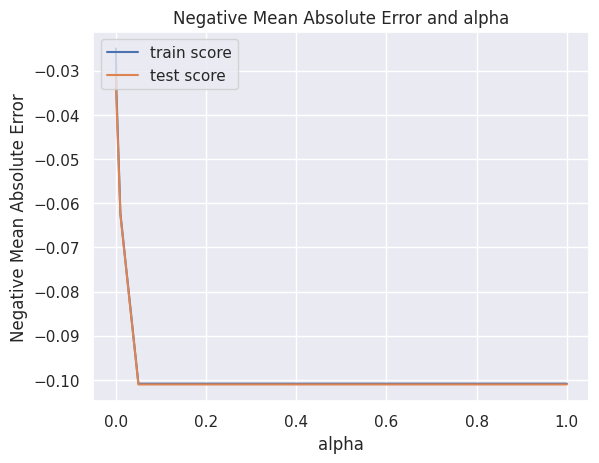

In [ ]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
model_cv.best_params_

{'alpha': 0.0001}

### **Building Model**

In [ ]:
# At alpha = 0.0001, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([-2.09563638e-02, -1.83054753e-02,  5.65318072e-02,  1.49561911e-01,
        9.00733405e-02, -0.00000000e+00, -0.00000000e+00,  1.13864645e-03,
        0.00000000e+00,  0.00000000e+00,  7.51267447e-03,  4.15864182e-01,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  6.76104834e-02,
        2.66173845e-02,  0.00000000e+00,  3.95194858e-03,  1.61641617e-02,
       -0.00000000e+00, -5.13950626e-02,  3.89507194e-02,  4.62355523e-02,
        5.20977848e-02,  3.90505628e-02,  3.70127007e-03, -4.11938084e-03,
        4.81420515e-03, -1.77400101e-02,  2.30247723e-03,  2.17318319e-02,
        2.72180282e-02,  2.65065012e-02,  1.32422423e-02, -7.53113447e-03,
       -0.00000000e+00, -2.13093467e-03,  8.86851282e-03,  0.00000000e+00,
        0.00000000e+00, -9.84157240e-03, -0.00000000e+00,  2.56635804e-02,
       -9.10090698e-04,  4.71745681e-02, -2.97478178e-02,  0.00000000e+00,
       -2.96111350e-02, -3.40355443e-02, -5.14567698e-03, -4.18959454e-03,
       -0.00000000e+00,  

In [ ]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 4) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.1529),
 ('MSSubClass', -0.021),
 ('LotFrontage', -0.0183),
 ('LotArea', 0.0565),
 ('OverallQual', 0.1496),
 ('OverallCond', 0.0901),
 ('MasVnrArea', -0.0),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 0.0011),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0075),
 ('GrLivArea', 0.4159),
 ('BsmtHalfBath', -0.0),
 ('KitchenAbvGr', -0.0),
 ('Fireplaces', 0.0),
 ('GarageArea', 0.0676),
 ('WoodDeckSF', 0.0266),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.004),
 ('ScreenPorch', 0.0162),
 ('MiscVal', -0.0),
 ('PropAge', -0.0514),
 ('MSZoning_FV', 0.039),
 ('MSZoning_RH', 0.0462),
 ('MSZoning_RL', 0.0521),
 ('MSZoning_RM', 0.0391),
 ('Alley_Pave', 0.0037),
 ('Alley_none', -0.0041),
 ('LotShape_IR2', 0.0048),
 ('LotShape_IR3', -0.0177),
 ('LotShape_Reg', 0.0023),
 ('LandContour_HLS', 0.0217),
 ('LandContour_Low', 0.0272),
 ('LandContour_Lvl', 0.0265),
 ('LotConfig_CulDSac', 0.0132),
 ('LotConfig_FR2', -0.0075),
 ('LotConfig_FR3', -0.0),
 ('LotConfig_Inside', -0.0021),
 ('L

In [ ]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable   Coeff
0     constant  0.1529
1   MSSubClass -0.0210
2  LotFrontage -0.0183
3      LotArea  0.0565
4  OverallQual  0.1496

In [ ]:
para = para[para.Coeff != 0].sort_values('Coeff', axis = 0, ascending = False)
print(para.shape)
para.head(10)

(126, 2)


Variable   Coeff
12              GrLivArea  0.4159
0                constant  0.1529
4             OverallQual  0.1496
5             OverallCond  0.0901
16             GarageArea  0.0676
3                 LotArea  0.0565
25            MSZoning_RL  0.0521
46   Neighborhood_Crawfor  0.0472
24            MSZoning_RH  0.0462
212        SaleType_ConLD  0.0439

### **Model Evaluation**

In [ ]:
# prediction on the train set(Using R2)
y_train_pred = lasso.predict(X_train)
lasso_train_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

# prediction on the test set(Using R2)
y_test_pred = lasso.predict(X_test)
lasso_test_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9121399518030313
0.8866356071880621


In [ ]:
# Calculate RSS for train set
residuals = y_train - y_train_pred
lasso_train_RSS = sum(residuals ** 2)
print(lasso_train_RSS)

# Calculate RSS for test set
residuals = y_test - y_test_pred
lasso_test_RSS = sum(residuals ** 2)
print(lasso_test_RSS)

1.491567872114548
0.867889347328778


In [ ]:
# Calculate adjusted R-squared for train set
num_predictors = len(para)-1
n = len(X_train)
lasso_train_adj_r2 = 1 - ((1 - lasso_train_r2) * (n - 1) / (n - num_predictors - 1))
print(lasso_train_adj_r2)

# Calculate adjusted R-squared for test set
n = len(X_test)
lasso_test_adj_r2 = 1 - ((1 - lasso_test_r2) * (n - 1) / (n - num_predictors - 1))
print(lasso_test_adj_r2)

0.8998689953509407
0.8413622873749879


In [ ]:
# Calculate RMSE for train set
lasso_train_RMSE = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

# Calculate RMSE for test set
lasso_test_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.03822158027785968
RMSE : 0.04446311843001042


### **Residual Analysis**
**In Residual Analysis we check below mentioned characteristics,**
* Normality of Error Terms
* Colinearity
* Homoscedasticity
* Indepedance of residuals

* **Normality of Error Terms**

Text(0.5, 0, 'Errors')

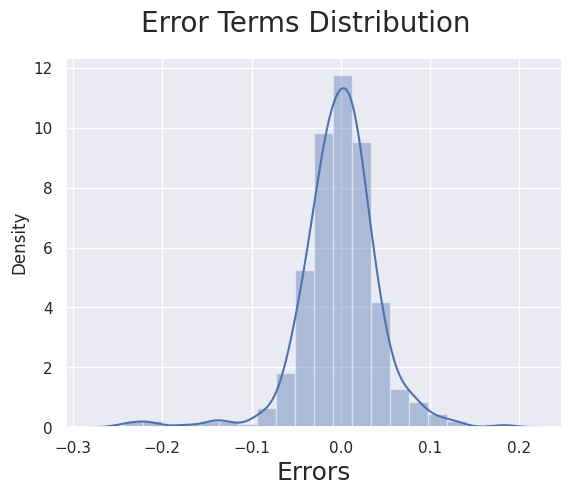

In [ ]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_test-y_test_pred), bins = 20)
fig.suptitle('Error Terms Distribution', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

* **Colinearity**

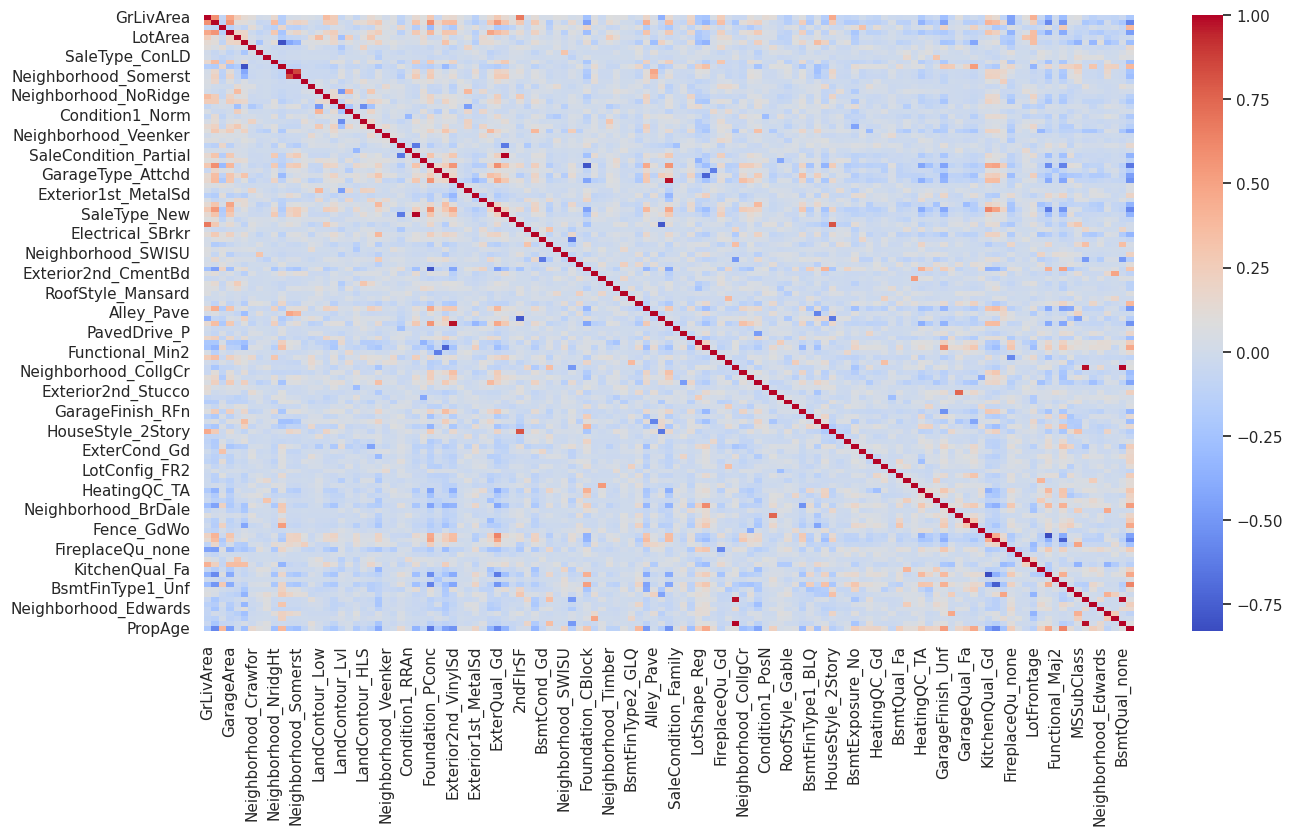

In [ ]:
# Let's check pairwise correlation
X_train_new = X_train[para[para.Variable != 'constant'].Variable]
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(), cmap="coolwarm")
plt.show()

* **Homoscedasticity**

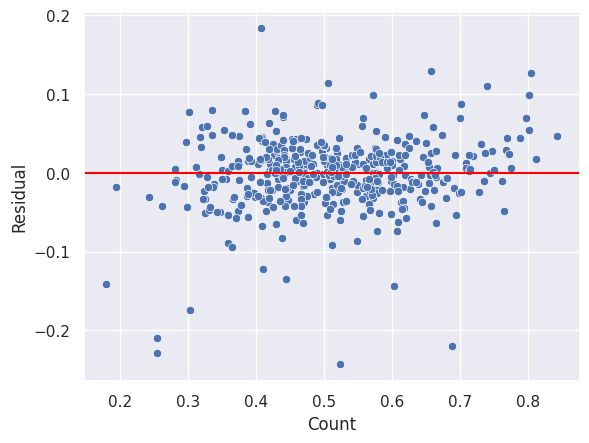

In [ ]:
sns.scatterplot(x=y_test_pred, y=(y_test-y_test_pred))
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

* **Indepedance of residuals**

In [ ]:
# Obtain Durbin-Watson statistic
lasso_durbin_watson_stat = sm.stats.stattools.durbin_watson((y_test-y_test_pred))
lasso_durbin_watson_stat

2.061310371748223

**Interpreting Durbin-Watson statistic values:**

> * Near 2: This is the ideal scenario and suggests no autocorrelation in the residuals.
* Between 0 and 2: Indicates positive autocorrelation, with values closer to 0 suggesting stronger positive autocorrelation.
* Between 2 and 4: Indicates negative autocorrelation, with values closer to 4 suggesting stronger negative autocorrelation.

## **Step 5.3 - Ridge Regression**

### **Setting up Hyperparameter Value**

In [ ]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.013769      0.000494         0.005668        0.000145      0.0001   
1       0.023606      0.005399         0.011247        0.003498       0.001   
2       0.028993      0.001041         0.012540        0.003095        0.01   
3       0.053517      0.007120         0.015743        0.009250        0.05   
4       0.041602      0.005641         0.016509        0.004440         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.034836          -0.031724          -0.035730   
1   {'alpha': 0.001}          -0.034830          -0.031717          -0.035775   
2    {'alpha': 0.01}          -0.034781          -0.031696          -0.035914   
3    {'alpha': 0.05}          -0.034666          -0.031613          -0.035822   
4     {'alpha': 0.1}          -0.034521          -0.031553          -0.035554   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.033390  ...        -0.034211        0.001477               19   
1          -0.033313  ...        -0.034192        0.001489               18   
2          -0.033065  ...        -0.034088        0.001509               17   
3          -0.032679  ...        -0.033798        0.001486               15   
4          -0.032309  ...        -0.033511        0.001448               13   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.024569           -0.020850           -0.022911   
1           -0.024569           -0.020853           -0.022902   
2           -0.024570           -0.020878           -0.022868   
3           -0.024576           -0.020955           -0.022845   
4           -0.024575           -0.021036           -0.022852   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.024798           -0.024871         -0.023600         0.001551  
1           -0.024800           -0.024873         -0.023599         0.001551  
2           -0.024816           -0.024887         -0.023604         0.001551  
3           -0.024872           -0.024927         -0.023635         0.001542  
4           -0.024940           -0.024962         -0.023673         0.001530  

[5 rows x 21 columns]

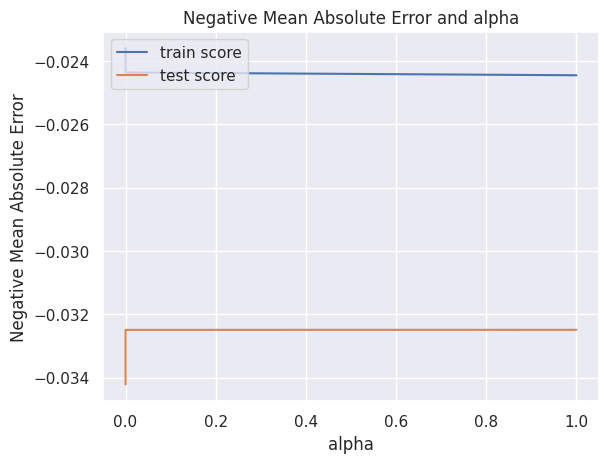

In [ ]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
model_cv.best_params_

{'alpha': 1.0}

### **Building Model**

In [ ]:
alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.35247243e-02, -3.92917972e-02,  8.10963683e-02,  1.27752322e-01,
        8.06005156e-02, -9.72603149e-03, -1.31033610e-02,  1.92774634e-02,
        4.96719798e-02,  1.46945550e-01,  9.81786377e-02,  1.67974831e-01,
       -6.40396009e-03, -1.19650471e-02, -2.52420806e-03,  7.61715391e-02,
        2.89918823e-02,  2.67117167e-03,  1.99237461e-02,  1.83007183e-02,
        2.45127727e-03, -4.29608054e-02,  6.22613779e-02,  6.97710103e-02,
        7.33146095e-02,  6.79125989e-02,  9.50622829e-03, -5.00819682e-03,
        6.79644634e-03, -2.20053089e-02,  3.89269744e-03,  2.89652517e-02,
        3.32885428e-02,  3.47458291e-02,  1.30771723e-02, -1.49533321e-02,
       -5.09402546e-03, -3.90814894e-03,  1.31241879e-02, -5.46115049e-03,
       -5.20721951e-03, -2.67332426e-02, -6.81634317e-03,  2.86265015e-02,
       -1.93162847e-03,  5.16073287e-02, -3.49766609e-02,  4.69612961e-03,
       -3.80118069e-02, -5.50357983e-02, -1.48079765e-02, -4.05612528e-03,
       -6.03558905e-03,  

In [ ]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.169),
 ('MSSubClass', -0.024),
 ('LotFrontage', -0.039),
 ('LotArea', 0.081),
 ('OverallQual', 0.128),
 ('OverallCond', 0.081),
 ('MasVnrArea', -0.01),
 ('BsmtFinSF1', -0.013),
 ('BsmtFinSF2', 0.019),
 ('TotalBsmtSF', 0.05),
 ('1stFlrSF', 0.147),
 ('2ndFlrSF', 0.098),
 ('GrLivArea', 0.168),
 ('BsmtHalfBath', -0.006),
 ('KitchenAbvGr', -0.012),
 ('Fireplaces', -0.003),
 ('GarageArea', 0.076),
 ('WoodDeckSF', 0.029),
 ('OpenPorchSF', 0.003),
 ('EnclosedPorch', 0.02),
 ('ScreenPorch', 0.018),
 ('MiscVal', 0.002),
 ('PropAge', -0.043),
 ('MSZoning_FV', 0.062),
 ('MSZoning_RH', 0.07),
 ('MSZoning_RL', 0.073),
 ('MSZoning_RM', 0.068),
 ('Alley_Pave', 0.01),
 ('Alley_none', -0.005),
 ('LotShape_IR2', 0.007),
 ('LotShape_IR3', -0.022),
 ('LotShape_Reg', 0.004),
 ('LandContour_HLS', 0.029),
 ('LandContour_Low', 0.033),
 ('LandContour_Lvl', 0.035),
 ('LotConfig_CulDSac', 0.013),
 ('LotConfig_FR2', -0.015),
 ('LotConfig_FR3', -0.005),
 ('LotConfig_Inside', -0.004),
 ('LandSlope_Mo

In [ ]:
# Creating a dataframe for the coefficients obtained from Ridge
mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para = para.sort_values('Coeff', axis = 0, ascending = False)
para.head(7)

Variable  Coeff
0      constant  0.169
12    GrLivArea  0.168
10     1stFlrSF  0.147
4   OverallQual  0.128
11     2ndFlrSF  0.098
3       LotArea  0.081
5   OverallCond  0.081

### **Model Evaluation**

In [ ]:
# predict
y_train_pred = ridge.predict(X_train)
ridge_train_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge.predict(X_test)
ridge_test_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9197354806553408
0.8790582680170884


In [ ]:
# Calculate RSS for train set
residuals = y_train - y_train_pred
ridge_train_RSS = sum(residuals ** 2)
print(ridge_train_RSS)

# Calculate RSS for test set
residuals = y_test - y_test_pred
ridge_test_RSS = sum(residuals ** 2)
print(ridge_test_RSS)

1.3626213595605614
0.92589955480631


In [ ]:
# Calculate adjusted R-squared for train set
num_predictors = len(para)-1
n = len(X_train)
ridge_train_adj_r2 = 1 - ((1 - ridge_train_r2) * (n - 1) / (n - num_predictors - 1))
print(ridge_train_adj_r2)

# Calculate adjusted R-squared for test set
n = len(X_test)
ridge_test_adj_r2 = 1 - ((1 - ridge_test_r2) * (n - 1) / (n - num_predictors - 1))
print(ridge_test_adj_r2)

0.8974062534692326
0.754757043479096


In [ ]:
# Calculate RMSE for train set
ridge_train_RMSE = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

# Calculate RMSE for test set
ridge_test_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.036532107348827954
RMSE : 0.045925054199243365


### **Residual Analysis**
**In Residual Analysis we check below mentioned characteristics,**
* Normality of Error Terms
* Homoscedasticity
* Indepedance of residuals

* **Normality of Error Terms**

Text(0.5, 0, 'Errors')

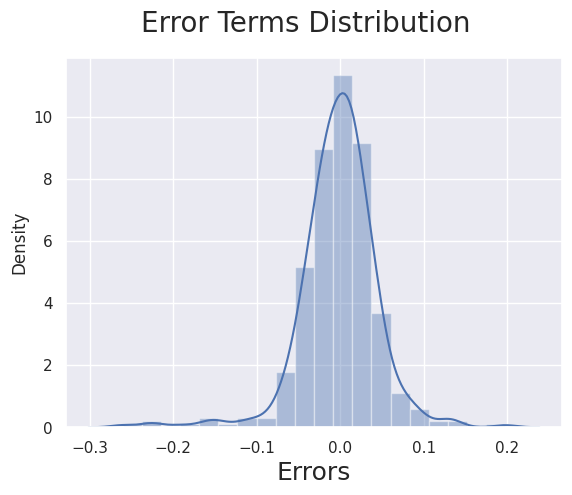

In [ ]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_test-y_test_pred), bins = 20)
fig.suptitle('Error Terms Distribution', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

* **Homoscedasticity**

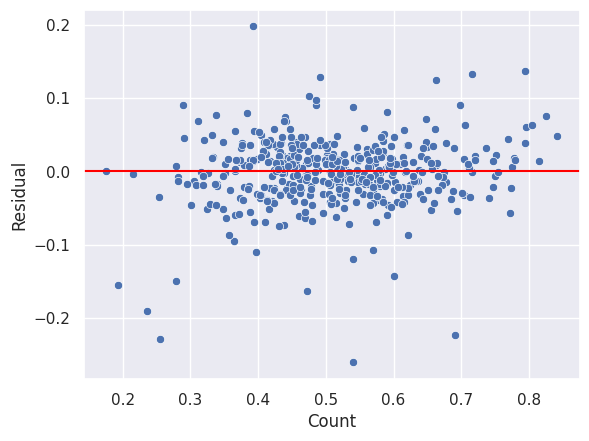

In [ ]:
sns.scatterplot(x=y_test_pred, y=(y_test-y_test_pred))
plt.axhline(y=0, color='red', linestyle='-')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

* **Indepedance of residuals**

In [ ]:
# Obtain Durbin-Watson statistic
ridge_durbin_watson_stat = sm.stats.stattools.durbin_watson((y_test-y_test_pred))
ridge_durbin_watson_stat

2.0460673201322077

**Interpreting Durbin-Watson statistic values:**

> * Near 2: This is the ideal scenario and suggests no autocorrelation in the residuals.
* Between 0 and 2: Indicates positive autocorrelation, with values closer to 0 suggesting stronger positive autocorrelation.
* Between 2 and 4: Indicates negative autocorrelation, with values closer to 4 suggesting stronger negative autocorrelation.

## **Step 6 - Model Comparison**

In [ ]:
compare_stats = {
                    'Metrics' : ['R-Square(Train)', 'R-Square(Test)', 'Adj. R- Square(Train)', 'Adj. R- Square(Test)',
                                 'RSS(Train)', 'RSS(Test)', 'RMSE(Train)', 'RMSE(Test)', 'Durbin Watson Stats'],
                    'Linear Regression' : [lr_train_r2, lr_test_r2, lr_train_adj_r2, lr_test_adj_r2, lr_train_RSS,
                                           lr_test_RSS, lr_train_RMSE, lr_test_RMSE, lr_durbin_watson_stat],
                    'Lasso Regression' : [lasso_train_r2, lasso_test_r2, lasso_train_adj_r2, lasso_test_adj_r2,
                                          lasso_train_RSS, lasso_test_RSS, lasso_train_RMSE, lasso_test_RMSE,
                                          lasso_durbin_watson_stat],
                    'Ridge Regression' : [ridge_train_r2, ridge_test_r2, ridge_train_adj_r2, ridge_test_adj_r2,
                                          ridge_train_RSS, ridge_test_RSS, ridge_train_RMSE, ridge_test_RMSE,
                                          ridge_durbin_watson_stat]
                }
compare_stats = pd.DataFrame(compare_stats)
compare_stats

Metrics  Linear Regression  Lasso Regression  \
0        R-Square(Train)           0.871697          0.912140   
1         R-Square(Test)           0.865890          0.886636   
2  Adj. R- Square(Train)           0.867942          0.899869   
3   Adj. R- Square(Test)           0.856381          0.841362   
4             RSS(Train)           2.178159          1.491568   
5              RSS(Test)           1.026714          0.867889   
6            RMSE(Train)           0.046188          0.038222   
7             RMSE(Test)           0.048361          0.044463   
8    Durbin Watson Stats           2.042389          2.061310   

   Ridge Regression  
0          0.919735  
1          0.879058  
2          0.897406  
3          0.754757  
4          1.362621  
5          0.925900  
6          0.036532  
7          0.045925  
8          2.046067

### **Observation**
* Though the all three models showing best performance in terms of R2 values of Train and Test, It is better to use Lasso, since it brings and assigns a zero value to insignificant features, enabling us to choose the predictive variables.
* It is always advisable to use simple yet robust model.

### **Inference**


* Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house.

*  The higher values of positive coeeficients suggest a high sale value.

#### Some of those features are:-
 |  Feature  |  Description  |
 |  ---  |  ---  |
 |  GrLivArea  |  Above grade (ground) living area square feet  |
 |  OverallQual  |  Rates the overall material and finish of the house  |
 |  OverallCond  |  Rates the overall condition of the house  |
 |  LotArea  |  Lot size in square feet  |
 |  GarageArea   |Size of garage in square feet  |
        
* The higher values of negative coeeficients suggest a decrease in sale value.

#### Some of those features are:-
   |  Feature  |  Description  |
   |  ---  |  ---  |
   |  PropAge  |  Age of the property at the time of seeling  |
   |  LotFrontage  |  Linear feet of street connected to property  |
    

* When the market value of the property is lower than the Predicted Sale Price, its the time to buy.
